<a href="https://colab.research.google.com/github/jcandane/uwmanifeld/blob/main/uwmanifeld_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax

jax.config.update("jax_enable_x64", True)

import os
import jax, jax.numpy as jnp
import matplotlib.pyplot as plt

try:
    from jeigsh import jeigsh
except:
    os.system("wget https://raw.githubusercontent.com/jcandane/uwmanifeld/main/jeigsh.py")
    from jeigsh import jeigsh

try:
    from uwmanifeld import DiffusionMap
except:
    os.system("wget https://raw.githubusercontent.com/jcandane/uwmanifeld/main/uwmanifeld.py")
    from uwmanifeld import DiffusionMap

try:
    R_ix = jnp.load("saxs_highq_100k.npy")
except:
    os.system("wget https://raw.githubusercontent.com/jcandane/uwmanifold/main/gym_rings.py")
    os.system("wget https://huggingface.co/datasets/jcandane/rings/resolve/main/saxs_highq_100k.npy")
    R_ix = jnp.load("saxs_highq_100k.npy")

#!git clone https://github.com/jcandane/uwmanifold.git

In [2]:
print( R_ix.shape, type(R_ix), R_ix.devices(), R_ix.dtype )
R_ix.shape

(100000, 300) <class 'jaxlib.xla_extension.ArrayImpl'> {cuda(id=0)} float32


(100000, 300)

In [6]:
%timeit DiffusionMap(R_ix, c=1)
%timeit DiffusionMap(R_ix, k=6, c=2**8)

256 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.1 s ± 57.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
embedding = DiffusionMap(R_ix, k=6, c=2**10)

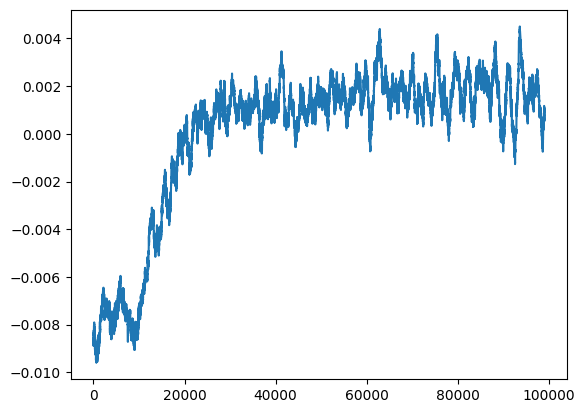

In [8]:
plt.plot(embedding[:,0])
plt.show()